In [11]:
####image recognition of mnist dataset using deep learning
import tensorflow as tf #import library 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


0


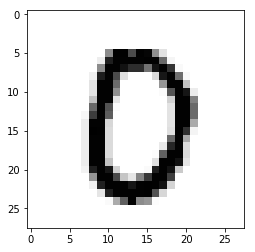

In [12]:
import matplotlib.pyplot as plt#to plot the image
%matplotlib inline 
import random
image_index= random.randint(7000,7010)###check the image

print(y_train[image_index])
plt.imshow(x_train[image_index],cmap='Greys')


In [13]:
#to identify the shape of dataset
print("the training data shape is ",x_train.shape)#(60000,28,28)----60000 images with 28x28
print("the testing data shape is",x_test.shape)#(10000,28,28)------10000 images with 28x28

the training data shape is  (60000, 28, 28)
the testing data shape is (10000, 28, 28)


In [14]:
##Preprocess input data
x_train=x_train.reshape(x_train.shape[0],28,28,1)#to convert data to 4dims
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print("x_train after reshaping",x_train.shape)
input_shape=(28,28,1)
x_train=x_train.astype('float32') ####for float values
x_test=x_test.astype('float32')
x_train/=255 ####normalising
x_test/=255
print('x_train.shape:after normalising',x_train.shape)

x_train after reshaping (60000, 28, 28, 1)
x_train.shape:after normalising (60000, 28, 28, 1)


In [15]:
#import keras module having models and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model=Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())#to convert 2D to 1D array
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))#to fight overfitting
model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
#non-optimised to optimised CNN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=10)####fit the model

Epoch 1/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2300 - acc: 0.9313
Epoch 2/10
30560/60000 [==============>...............] - ETA: 55s - loss: 0.0988 - acc: 0.9699

In [51]:
###final evaluation of model
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 3s 265us/step


[0.06292780979168783, 0.9844]

In [3]:
#### individual evaluation
image_index = 5555
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())


NameError: name 'plt' is not defined